In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

In [3]:
# Inspect data 
len(train_users.id.unique()), len(test_users.id.unique()), train_users.shape, test_users.shape

(213451, 62096, (213451, 16), (62096, 15))

In [4]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [5]:
# Change Dates columns to Python Date format
users['date_account_created'] = pd.to_datetime(users['date_account_created'], format='%Y-%m-%d')
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
#users['date_account_created'].fillna(df_all.timestamp_first_active, inplace=True)

In [6]:
# Extract Date Features
import datetime as dt
users['day_account_created'] = users['date_account_created'].dt.weekday
users['month_account_created'] = users['date_account_created'].dt.month
users['quarter_account_created'] = users['date_account_created'].dt.quarter
users['year_account_created'] = users['date_account_created'].dt.year
users['hour_first_active'] = users['timestamp_first_active'].dt.hour
users['day_first_active'] = users['timestamp_first_active'].dt.weekday
users['month_first_active'] = users['timestamp_first_active'].dt.month
users['quarter_first_active'] = users['timestamp_first_active'].dt.quarter
users['year_first_active'] = users['timestamp_first_active'].dt.year
users['created_less_active'] = (users['date_account_created'] - users['timestamp_first_active']).dt.days

Data Exploration

In [7]:
users.gender.value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

Plot Histogram Gender

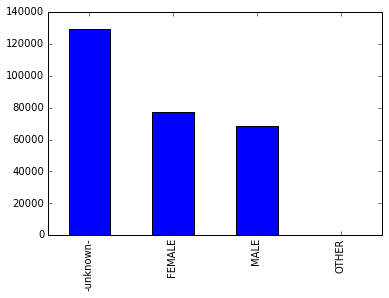

In [8]:
#import seaborn
#seaborn.distplot(users.gender)

import matplotlib.pyplot as plt
%matplotlib inline

users.gender.value_counts().plot(kind='bar')

In [9]:
users.gender.value_counts().index

Index([u'-unknown-', u'FEMALE', u'MALE', u'OTHER'], dtype='object')

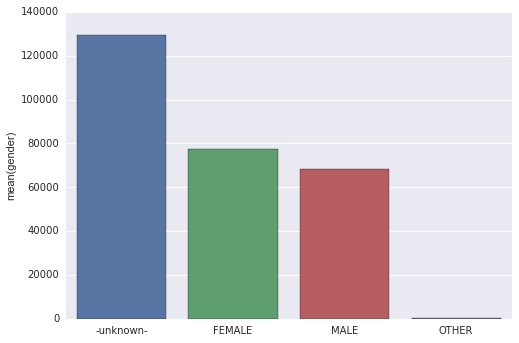

In [10]:
import seaborn as sns

ax = sns.barplot(x=users.gender.value_counts().index, y=users.gender.value_counts())

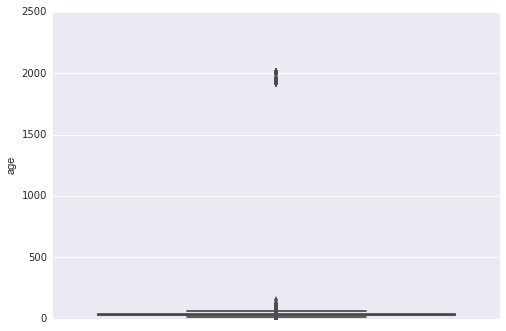

In [11]:
ax = sns.boxplot(y=users.age)

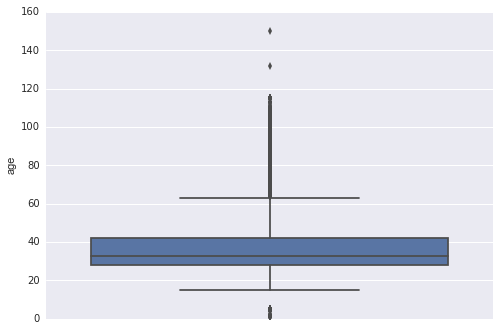

In [12]:
ax = sns.boxplot(y=users[users.age < 200].age)

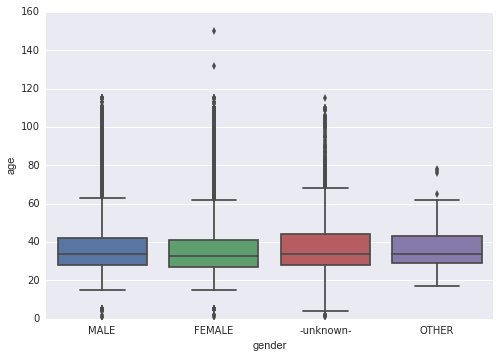

In [13]:
ax = sns.boxplot(x='gender',y='age',data=users[users.age < 200])

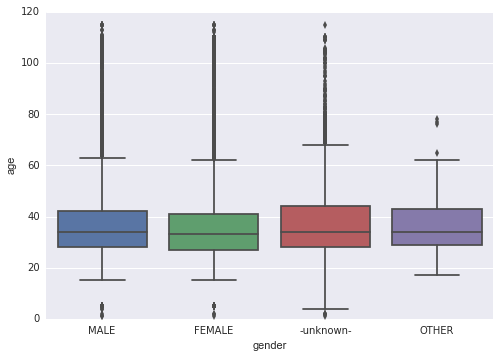

In [14]:
ax = sns.boxplot(x='gender',y='age',data=users[users.age < 120])

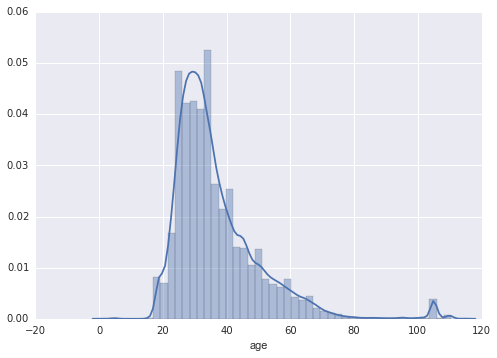

In [15]:
sns.distplot(users[users.age < 120].age)

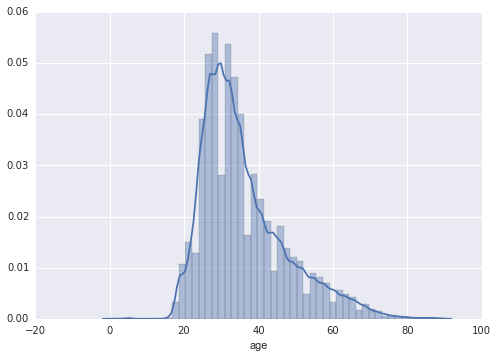

In [16]:
sns.distplot(users[users.age < 90].age)

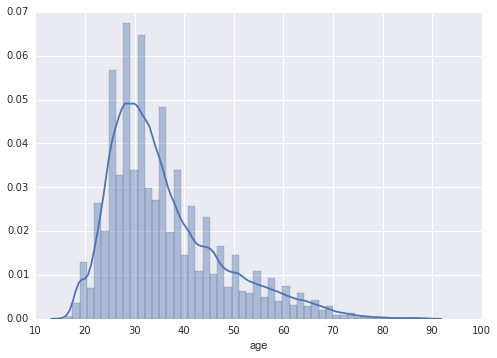

In [17]:
sns.distplot(users[(users.age < 90) & (users.age > 15)].age)

In [18]:
users[(users.age < 90) & (users.age > 15)].age.describe()

count    155664.000000
mean         35.957794
std          11.419194
min          16.000000
25%          28.000000
50%          33.000000
75%          41.000000
max          89.000000
Name: age, dtype: float64

In [19]:
users[(users.age < 90) & (users.age > 15)].age.median()

33.0

In [20]:
users_by_age = users[(users.age < 90) & (users.age > 15)][['age','country_destination']]

In [21]:
len(users[users.age.isnull()==False]), len(users[users.age.isnull()]), len(users)

(158681, 116866, 275547)

In [22]:
len(users_by_age[users_by_age.age.isnull()==False]), len(users[users.age.isnull()])

(155664, 116866)

In [23]:
users_by_age.country_destination.value_counts()

NDF      55696
US       47631
other     7400
FR        3650
IT        1985
GB        1736
ES        1675
CA        1055
DE         833
NL         590
AU         428
PT         156
Name: country_destination, dtype: int64

In [24]:
sum(users_by_age.country_destination.value_counts()), len(users_by_age[users_by_age.country_destination.isnull()])

(122835, 32829)

In [25]:
# Age distribution and country destination
users_by_age = users[(users.age < 90) & (users.age > 15)][['age','country_destination']]

age_range = [(15,19),(20,24),(25,29),(30,34),(35,39),(40,44),(45,49),(50,54),(55,59),(60,64)]
age_group = []

age_group = [users_by_age[(users_by_age.age > v[0]) & (users_by_age.age <= v[1])].country_destination.value_counts() for v in age_range]


In [26]:
country = users_by_age.country_destination.unique().tolist()

In [27]:
country.remove(np.nan)

In [28]:
country

['NDF', 'US', 'other', 'CA', 'FR', 'IT', 'ES', 'GB', 'NL', 'DE', 'AU', 'PT']

In [29]:
country_age = []
for c in country:
    row = []
    for i in range(len(age_group)):
        try:
            row.append(age_group[i][c])
        except:
            row.append(0)
    print c
    print row
    country_age.append(row)

NDF
[919, 4083, 9783, 9254, 6223, 4283, 3243, 2363, 1662, 1141]
US
[581, 2807, 9623, 9453, 5587, 3309, 2182, 1546, 1210, 849]
other
[116, 471, 1345, 1492, 896, 532, 324, 246, 216, 137]
CA
[32, 40, 175, 205, 136, 85, 55, 51, 26, 20]
FR
[74, 282, 552, 682, 438, 286, 177, 170, 116, 75]
IT
[41, 192, 309, 370, 229, 135, 90, 83, 59, 41]
ES
[30, 200, 283, 319, 195, 85, 68, 56, 33, 33]
GB
[31, 136, 261, 289, 210, 120, 98, 77, 73, 50]
NL
[11, 64, 101, 109, 69, 34, 22, 15, 17, 19]
DE
[18, 62, 146, 156, 90, 63, 37, 29, 26, 20]
AU
[7, 17, 83, 64, 70, 32, 21, 22, 13, 7]
PT
[4, 12, 23, 34, 16, 10, 4, 6, 8, 3]


In [30]:
len(age_group), len(age_range)

(10, 10)

In [31]:
age_labels = [str(x[0])+'-'+str(x[1]) for x in age_range]

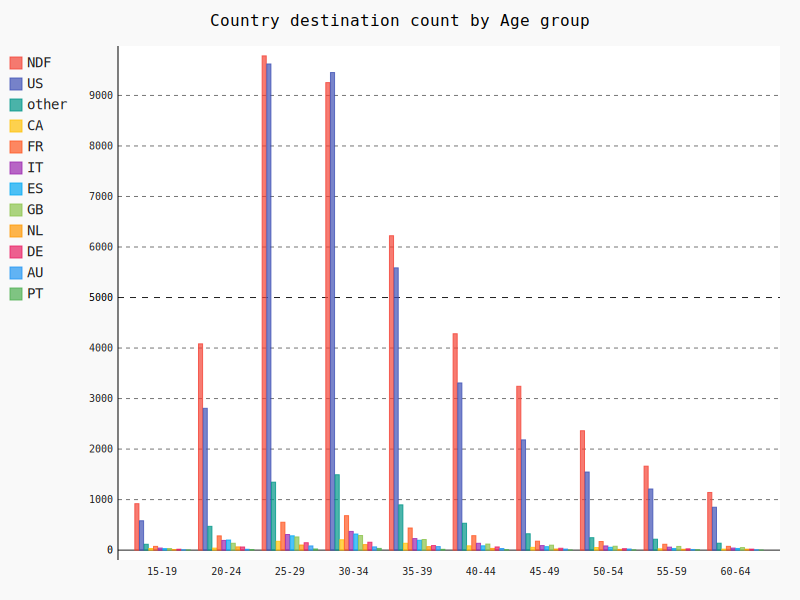

In [32]:
import pygal
from IPython.display import SVG

line_chart = pygal.Bar()
line_chart.title = 'Country destination count by Age group'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age[i])
line_chart.render_to_file('airbnb-age.svg')
SVG(filename='airbnb-age.svg')

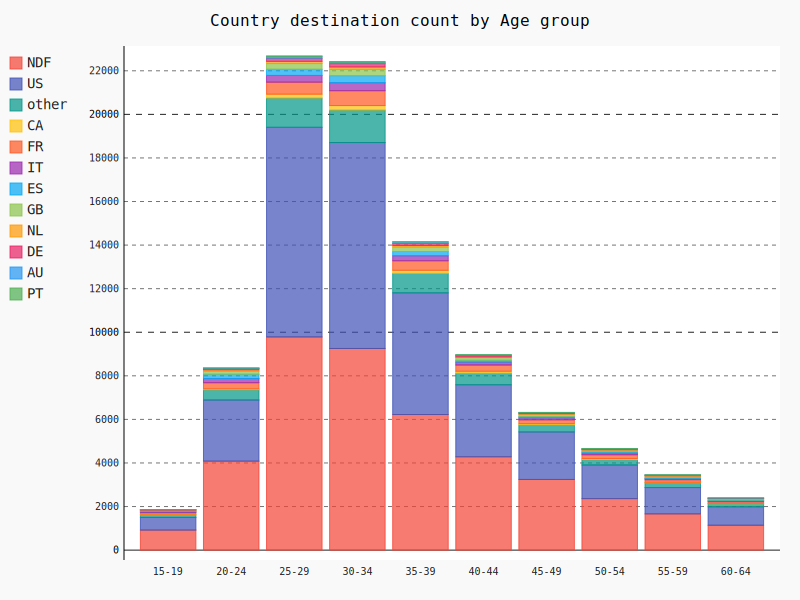

In [33]:
import pygal
from IPython.display import SVG

line_chart = pygal.StackedBar()
line_chart.title = 'Country destination count by Age group'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age[i])
line_chart.render_to_file('airbnb-age-stack.svg')
SVG(filename='airbnb-age-stack.svg')

In [34]:
country_age

[[919, 4083, 9783, 9254, 6223, 4283, 3243, 2363, 1662, 1141],
 [581, 2807, 9623, 9453, 5587, 3309, 2182, 1546, 1210, 849],
 [116, 471, 1345, 1492, 896, 532, 324, 246, 216, 137],
 [32, 40, 175, 205, 136, 85, 55, 51, 26, 20],
 [74, 282, 552, 682, 438, 286, 177, 170, 116, 75],
 [41, 192, 309, 370, 229, 135, 90, 83, 59, 41],
 [30, 200, 283, 319, 195, 85, 68, 56, 33, 33],
 [31, 136, 261, 289, 210, 120, 98, 77, 73, 50],
 [11, 64, 101, 109, 69, 34, 22, 15, 17, 19],
 [18, 62, 146, 156, 90, 63, 37, 29, 26, 20],
 [7, 17, 83, 64, 70, 32, 21, 22, 13, 7],
 [4, 12, 23, 34, 16, 10, 4, 6, 8, 3]]

In [35]:
country_age_percent = []
for c in country:
    row = []
    for i in range(len(age_group)):
        try:
            row.append(age_group[i][c] * 100/float(sum(age_group[i])))
        except:
            row.append(0)
    print c
    print row
    country_age_percent.append(row)

NDF
[49.302575107296136, 48.804685632321302, 43.127314406630227, 41.262763633120791, 43.950843986157217, 47.726766213505684, 51.305173232083533, 50.664665523156089, 48.048568950563748, 47.640918580375782]
US
[31.169527896995707, 33.552474300741096, 42.421971433609592, 42.150086948767111, 39.459001341902677, 36.873189213282814, 34.519854453409273, 33.147512864493997, 34.981208441746169, 35.448851774530269]
other
[6.2231759656652361, 5.6299306717666751, 5.9292893669546816, 6.6526954117804431, 6.3281305176919274, 5.9282371294851792, 5.1257712387280492, 5.2744425385934823, 6.2445793581960105, 5.7202505219206676]
CA
[1.7167381974248928, 0.47812574707147981, 0.77146887674131548, 0.91407678244972579, 0.96051981072109616, 0.947180744372632, 0.87011548805568739, 1.0934819897084047, 0.75166233015322348, 0.83507306889352817]
FR
[3.9699570815450644, 3.3707865168539324, 2.4334332569211781, 3.0409773933205511, 3.093438802175295, 3.1869846222420324, 2.8001898433792123, 3.6449399656946828, 3.353570396

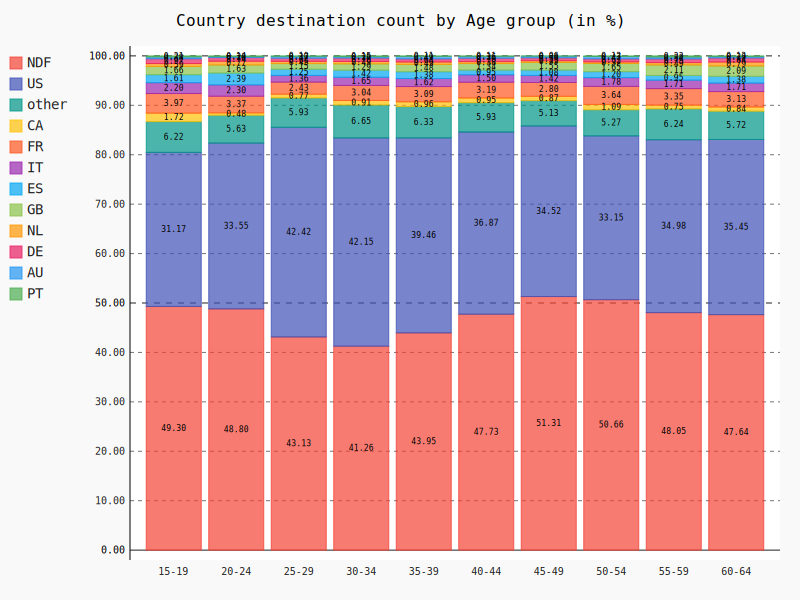

In [36]:
from pygal.style import DefaultStyle
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Age group (in %)'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age_percent[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-age-stack-percent.svg')
SVG(filename='airbnb-age-stack-percent.svg')

Explore null age and null gender columns

In [37]:
# Age distribution and country destination
users_no_age = users[users.age.isnull()][['age','country_destination']]
users_no_age = users_no_age.country_destination.value_counts()

In [38]:
len(country), len(country_age), len(country_age_percent), len(users_no_age)

(12, 12, 12, 12)

In [39]:
total_count = float(sum(users_no_age))
for i, c in enumerate(country):
    country_age[i].append(users_no_age[c])
    country_age_percent[i].append(users_no_age[c] * 100/total_count)

In [40]:
age_labels.append('no age')

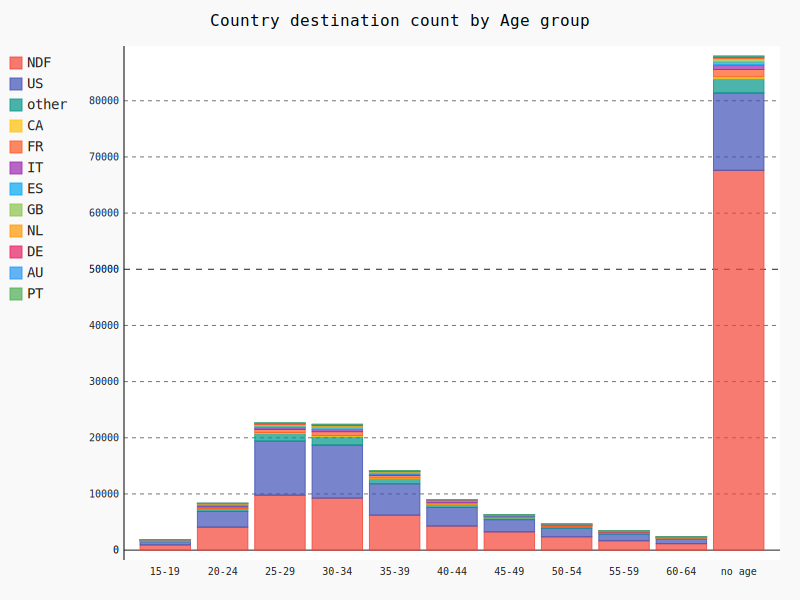

In [41]:
line_chart = pygal.StackedBar()
line_chart.title = 'Country destination count by Age group'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age[i])
line_chart.render_to_file('airbnb-age-stack.svg')
SVG(filename='airbnb-age-stack.svg')

In [42]:
users.shape, users[users.age.isnull()].shape

((275547, 26), (116866, 26))

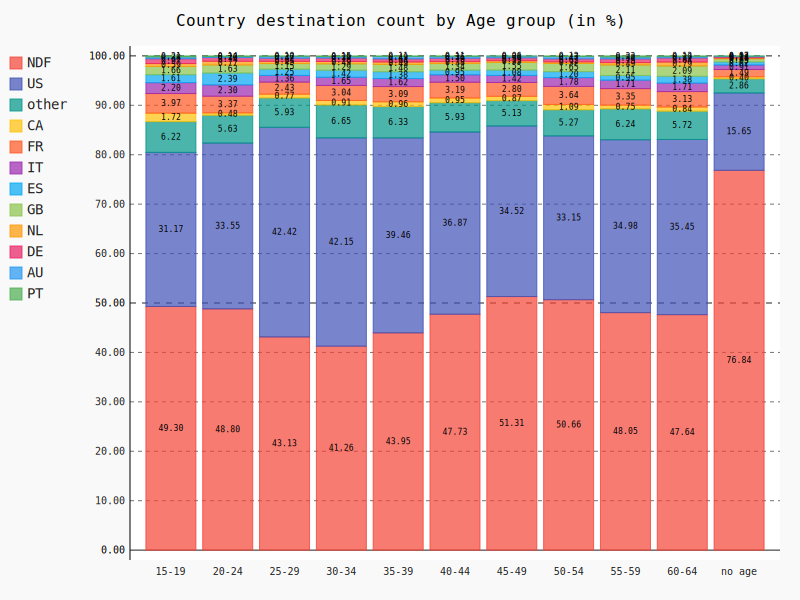

In [43]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Age group (in %)'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age_percent[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-age-stack-percent.svg')
SVG(filename='airbnb-age-stack-percent.svg')

In [44]:
# Explore Country destination by Gender
genderlist = users.gender.unique().tolist()
country_gender = []
for c in country:
    country_gender.append(users[users.country_destination == c].gender.value_counts())

In [45]:
len(country_gender)

12

In [46]:
for d in country_gender:
    d.sort_index(inplace=True)

In [47]:
country_gender

[-unknown-    66670
 FEMALE       31048
 MALE         26719
 OTHER          106
 Name: gender, dtype: int64, -unknown-    20109
 FEMALE       22694
 MALE         19457
 OTHER          116
 Name: gender, dtype: int64, -unknown-    3469
 FEMALE       3160
 MALE         3443
 OTHER          22
 Name: gender, dtype: int64, -unknown-    491
 FEMALE       455
 MALE         477
 OTHER          5
 Name: gender, dtype: int64, -unknown-    1713
 FEMALE       1962
 MALE         1335
 OTHER          13
 Name: gender, dtype: int64, -unknown-    1040
 FEMALE       1091
 MALE          699
 OTHER           5
 Name: gender, dtype: int64, -unknown-    715
 FEMALE       853
 MALE         677
 OTHER          4
 Name: gender, dtype: int64, -unknown-    758
 FEMALE       881
 MALE         682
 OTHER          3
 Name: gender, dtype: int64, -unknown-    227
 FEMALE       254
 MALE         278
 OTHER          3
 Name: gender, dtype: int64, -unknown-    284
 FEMALE       358
 MALE         416
 OTHER          3


In [48]:
genderlist.sort()

In [49]:
genderlist

['-unknown-', 'FEMALE', 'MALE', 'OTHER']

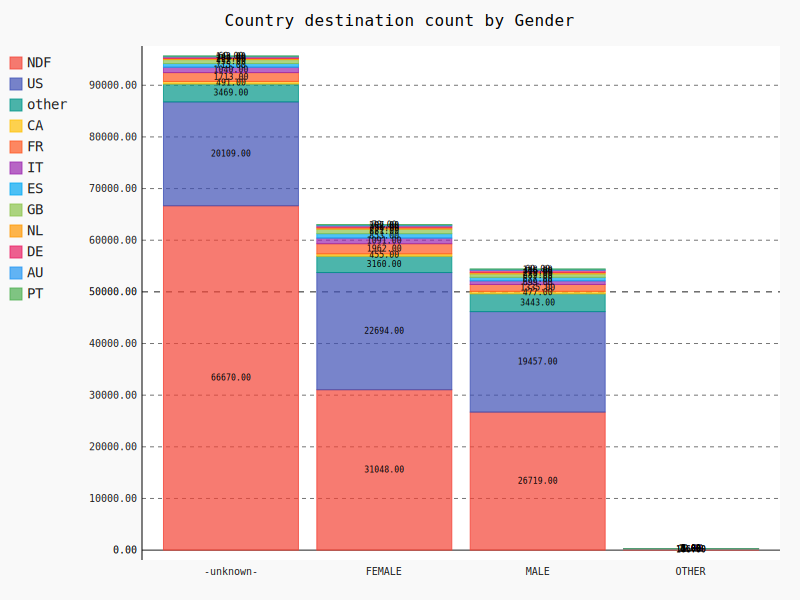

In [50]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack.svg')
SVG(filename='airbnb-gender-stack.svg')

In [51]:
country

['NDF', 'US', 'other', 'CA', 'FR', 'IT', 'ES', 'GB', 'NL', 'DE', 'AU', 'PT']

In [52]:
users[users.gender=='-unknown-'].country_destination.value_counts()

NDF      66670
US       20109
other     3469
FR        1713
IT        1040
GB         758
ES         715
CA         491
DE         284
NL         227
AU         143
PT          69
Name: country_destination, dtype: int64

In [53]:
sum_by_gender = []
for g in genderlist:
    sum_by_gender.append(users[users.gender==g].country_destination.count())

In [54]:
sum_by_gender

[95688, 63041, 54440, 282]

In [55]:
# Calculate percentage
country_gender_percentage = []
for g in range(len(country_gender)):
    row = []
    for i in range(len(sum_by_gender)):
        row.append(country_gender[g][i] * 100 / float(sum_by_gender[i]))
    country_gender_percentage.append(row)

In [56]:
country_gender_percentage

[[69.674358331243212,
  49.250487777795406,
  49.079720793534165,
  37.588652482269502],
 [21.015174316528718,
  35.998794435367458,
  35.740264511388688,
  41.134751773049643],
 [3.6253239695677619,
  5.0126108405640775,
  6.3243938280675973,
  7.8014184397163122],
 [0.51312599280996574,
  0.72175251027109344,
  0.87619397501836882,
  1.7730496453900708],
 [1.790193127664911,
  3.1122602750590884,
  2.4522409992652463,
  4.6099290780141846],
 [1.0868656466850597,
  1.7306197553972811,
  1.283982365907421,
  1.7730496453900708],
 [0.7472201320959786,
  1.3530876731016324,
  1.2435709037472447,
  1.4184397163120568],
 [0.79215784633391861,
  1.397503212195238,
  1.2527553269654665,
  1.0638297872340425],
 [0.23722932865145055,
  0.40291239034913784,
  0.51065393093313738,
  1.0638297872340425],
 [0.29679792659476634,
  0.56788439269681634,
  0.76414401175606173,
  1.0638297872340425],
 [0.14944402641919571,
  0.32835773544201391,
  0.34533431300514328,
  0.3546099290780142],
 [0.0721093

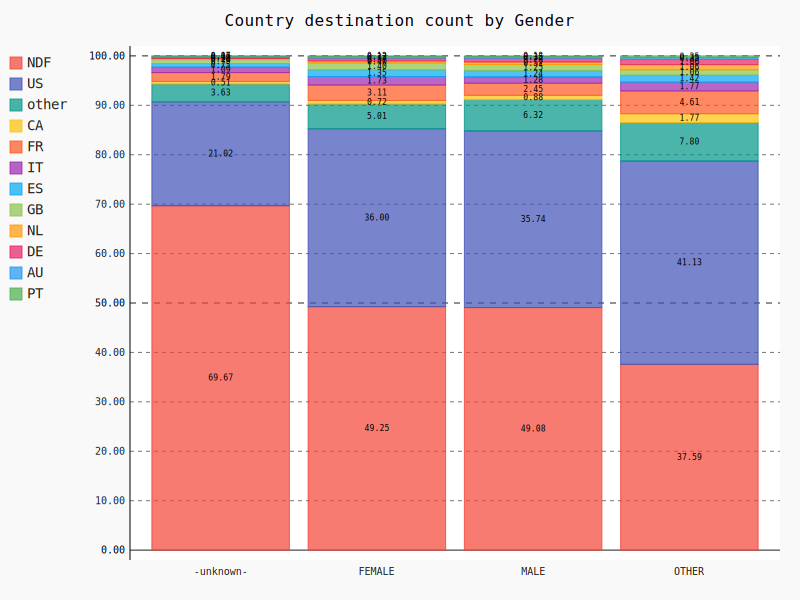

In [57]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender_percentage[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack-percentage.svg')
SVG(filename='airbnb-gender-stack-percentage.svg')

In [58]:
# Replace null in Gender field
users.gender.replace('-unknown-', np.nan, inplace=True)

In [59]:
# Nullify outliers
users.loc[users['age'] > 90,'age'] = np.NaN
users.loc[users['age'] < 15,'age'] = np.NaN

print len(users[users['age'] > 90])
print len(users[users['age'] < 15])
print len(users[users['age'].isnull()])

0
0
119853


In [60]:
users.age.mean(), users.age.median()

(35.963871440132564, 33.0)

In [61]:
#Plot age distribution again after handling outliers
users = users.fillna({'age':users.age.median()})

In [62]:
t_users = users.copy()
t_users = t_users.set_index('id')

cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'gender',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']
num_features = ['day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active',
 'age']
target = ['country_destination']

In [63]:
nogender_cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']

other_features = ['day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active',
 'age',
 'gender']

In [64]:
encode_users = pd.get_dummies(t_users[nogender_cat_features])

In [65]:
encode_users.shape, t_users[num_features].shape

((275547, 132), (275547, 11))

In [66]:
df_users = pd.merge(encode_users, t_users[other_features], how='inner', left_index=True, right_index=True)

In [67]:
df_users.shape

(275547, 144)

In [68]:
# Join/Merge with session data
user_devices = pd.read_csv('./data/user_devices.csv')
user_session = pd.read_csv('./data/user_session_detail.csv')

In [69]:
df_users = df_users.reset_index()

In [70]:
all_users = pd.merge(df_users, user_devices, how='left', left_on='id', right_on='user_id')
all_users = pd.merge(all_users, user_session, how='left', left_on='id', right_on='user_id')

In [71]:
all_users.shape

(275547, 316)

In [72]:
# Split notnull vs null gender
X_gender_users = all_users[all_users['gender'].isnull()==False]
X_pred_gender_users = all_users[all_users['gender'].isnull()]

In [73]:
y_gender_users = X_gender_users['gender']

In [74]:
id_X = X_gender_users.id
id_X_pred = X_pred_gender_users.id

In [75]:
X_gender_users = X_gender_users.drop(['gender','user_id_x','user_id_y','id'], axis=1)
X_pred_gender_users = X_pred_gender_users.drop(['gender','user_id_x','user_id_y','id'], axis=1)

In [76]:
X_gender_users = X_gender_users.fillna(0)
X_pred_gender_users = X_pred_gender_users.fillna(0)

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_y_gender_users = le.fit_transform(y_gender_users)

In [78]:
X_gender_users.shape, X_pred_gender_users.shape

((146067, 312), (129480, 312))

In [79]:
np.bincount(le_y_gender_users)

array([77524, 68209,   334])

In [80]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_gender_users, le_y_gender_users)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [81]:
pred_gender = neigh.predict(X_pred_gender_users)

In [82]:
np.bincount(pred_gender)

array([75981, 53499])

In [83]:
X_pred_gender_users['predicted_gender'] = le.inverse_transform(pred_gender)

In [84]:
impute_gender = pd.DataFrame(X_pred_gender_users['predicted_gender'])

In [85]:
impute_gender.head()

,predicted_gender
0,FEMALE
4,FEMALE
5,FEMALE
9,FEMALE
12,FEMALE


In [115]:
new_all_users = pd.merge(all_users, impute_gender, how='left', left_index=True, right_index=True)

In [116]:
new_all_users.shape, all_users.shape

((275547, 317), (275547, 316))

In [117]:
new_all_users.head()

,id,signup_flow,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,...,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips,predicted_gender
0,gxn3p5htnn,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE
1,820tgsjxq7,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,3,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE


In [118]:
new_all_users.loc[new_all_users.gender.isnull(),'gender'] = new_all_users['predicted_gender']

In [119]:
new_all_users = new_all_users.drop(['user_id_x','user_id_y','predicted_gender'], axis=1)

In [120]:
new_all_users.shape

(275547, 314)

In [122]:
# One-hot encoding Gender feature
new_all_users = new_all_users.set_index('id')
df_all_users = pd.get_dummies(new_all_users)

In [125]:
destination = t_users['country_destination'].reset_index()

In [126]:
destination.head()

,id,country_destination
0,gxn3p5htnn,NDF
1,820tgsjxq7,NDF
2,4ft3gnwmtx,US
3,bjjt8pjhuk,other
4,87mebub9p4,US


In [127]:
df_all_users = df_all_users.fillna(0)

In [128]:
df_all_users.head()

,signup_flow,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,...,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips,gender_FEMALE,gender_MALE,gender_OTHER
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
820tgsjxq7,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4ft3gnwmtx,3,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
bjjt8pjhuk,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
87mebub9p4,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [129]:
df_all_users = df_all_users.reset_index()
df_all_users = pd.merge(df_all_users, destination, how='inner', on='id')

In [130]:
df_all_users.shape

(275547, 317)

In [131]:
country_gender = []
for c in country:
    country_gender.append(df_all_users[df_all_users.country_destination == c].gender.value_counts())

AttributeError: 'DataFrame' object has no attribute 'gender'

In [98]:
for d in country_gender:
    d.sort_index(inplace=True)

In [99]:
genderlist.remove('-unknown-')

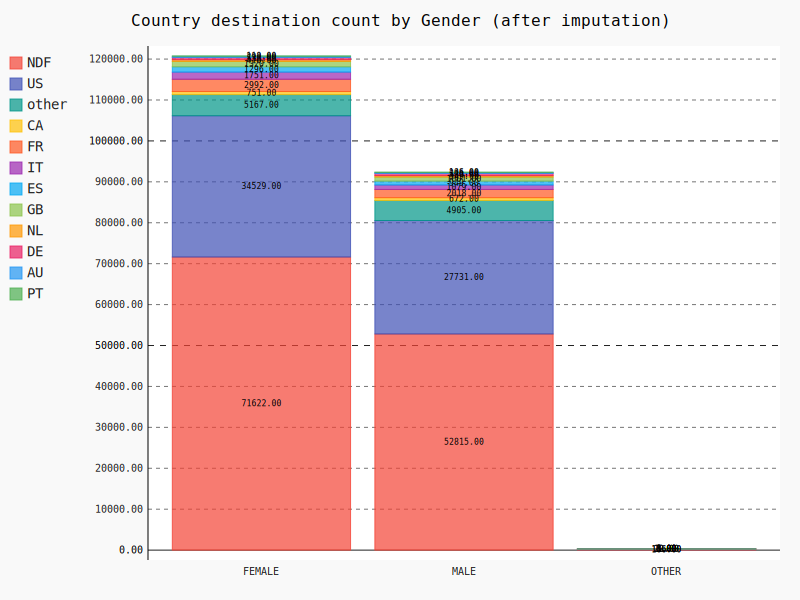

In [100]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender (after imputation)'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack-after.svg')
SVG(filename='airbnb-gender-stack-after.svg')

In [101]:
sum_by_gender = []
for g in genderlist:
    sum_by_gender.append(df_all_users[df_all_users.gender==g].country_destination.count())

In [102]:
sum_by_gender

[120779, 92390, 282]

In [103]:
# Calculate percentage
country_gender_percentage = []
for g in range(len(country_gender)):
    row = []
    for i in range(len(sum_by_gender)):
        row.append(country_gender[g][i] * 100 / float(sum_by_gender[i]))
    country_gender_percentage.append(row)

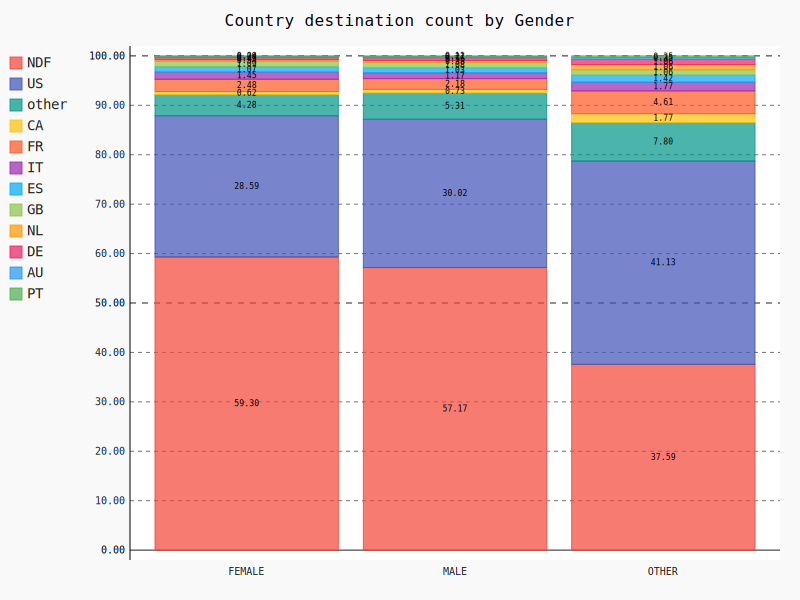

In [104]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender_percentage[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack-percentage.svg')
SVG(filename='airbnb-gender-stack-percentage.svg')

In [105]:
# One-hot encoding Gender feature
#df_all_users = df_all_users.set_index('id')
#df_all_users = pd.get_dummies(df_all_users)

In [132]:
# Split train and test data
df_test = df_all_users[df_all_users['country_destination'].isnull()]
df_train = df_all_users[df_all_users['country_destination'].isnull()==False]

In [133]:
df_test.shape, df_train.shape

((62096, 317), (213451, 317))

In [134]:
from sklearn.preprocessing import LabelEncoder
labels = df_train['country_destination']
le = LabelEncoder()
y = le.fit_transform(labels)
X = df_train.drop('country_destination', axis=1, inplace=False)

In [135]:
idtrain = df_train['id']
X = X.drop('id', axis=1, inplace=False)

In [136]:
X.shape, y.shape

((213451, 315), (213451,))

In [137]:
# Model 2
# Grid Search - Used to find best combination of parameters
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

# Skip Grid search for time saving
final_model = XGBClassifier(
        learning_rate =0.1,
        n_estimators=25,
        max_depth=3,
        objective='multi:softprob', 
        subsample=0.5, 
        colsample_bytree=0.5, 
        seed=0)
final_model.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=25, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

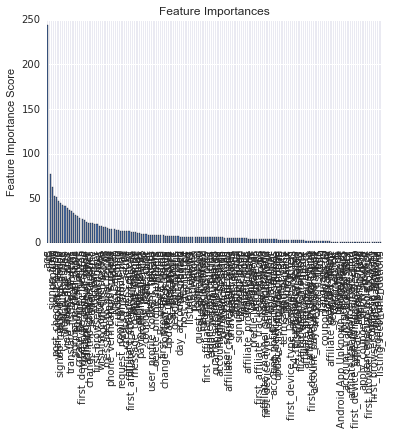

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = pd.Series(final_model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [139]:
feat_imp[:30]

age                              244
p5                                77
signup_flow                       63
pending                           52
post_checkout_action              51
year_account_created              47
signup_method_facebook            45
year_first_active                 42
signup_app_Web                    41
view_search_results               39
message_post                      37
translate_listing_reviews         36
your_trips                        33
signup_method_basic               31
hour_first_active                 30
create_phone_numbers              28
first_device_type_Mac Desktop     27
month_account_created             25
listing_reviews_page              23
affiliate_channel_other           22
change_trip_characteristics       22
header_userpic                    22
-unknown-_y                       21
first_browser_-unknown-           21
contact_host                      19
wishlist_content_update           19
month_first_active                18
p

In [140]:
#Prepare data for prediction
df_test = df_test.drop('country_destination', axis=1, inplace=False)
id_test = df_test['id']
X_test = df_test.drop('id', axis=1, inplace=False)
X_test.shape

(62096, 315)

In [141]:
# Make predictions
y_pred = final_model.predict_proba(X_test)

In [142]:
id_test = id_test.reset_index()
ids_test = id_test.id.values

In [143]:
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(ids_test)):
    idx = ids_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [144]:
len(ids), len(cts), ids[:10], cts[:10]

(310480,
 310480,
 ['5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j'],
 ['NDF', 'US', 'other', 'FR', 'IT', 'NDF', 'US', 'other', 'FR', 'IT'])

In [145]:
#Generate submission
print("Outputting final results...")
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('./data/submission-2016-11-09-r1csv', index=False)

Outputting final results...


In [146]:
sub.shape, df_test.shape

((310480, 2), (62096, 316))